In [5]:
# librairies

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

#to test without and remove if it works 

# from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
# from sklearn.model_selection import train_test_split

# from wordcloud import WordCloud

# datasets 
file_1 = r"..\data\raw\amz_uk_processed_data.csv"
df_amz_uk = pd.read_csv(file_1)

# import py class functions files 
# %load_ext autoreload
# %autoreload 2
from utils.exploration import AmazonExploration
from utils.preprocessing import AmazonDataPreprocessor, plot_final_distributions
from utils.eda import AmazonEDA
from utils.recommender import AmazonRecommender
from utils.evaluations import RecommenderEvaluator



# First Step : Exploration 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB

Null Values:
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

NaN Values:
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
p

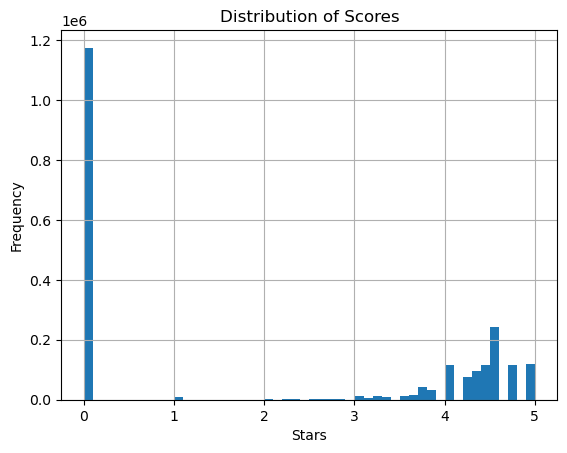

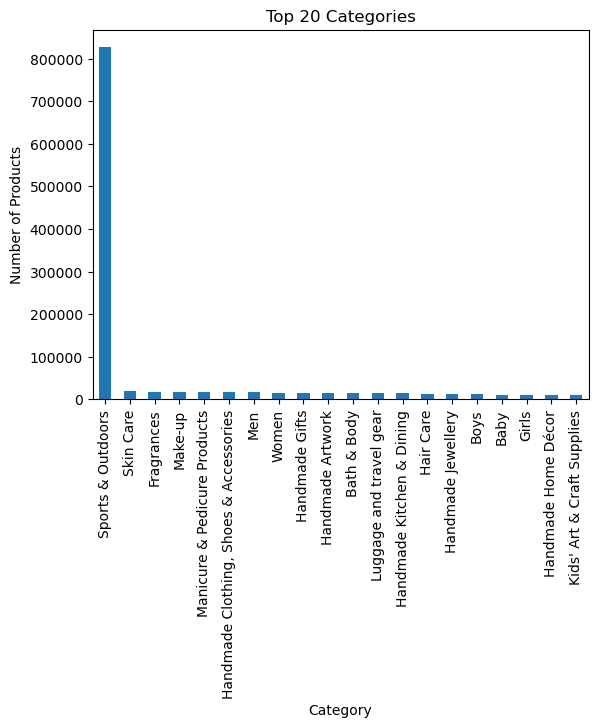

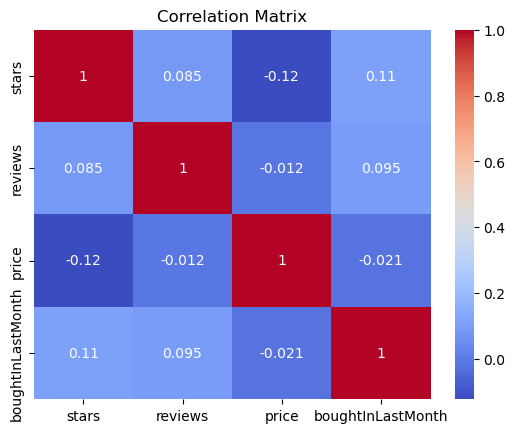

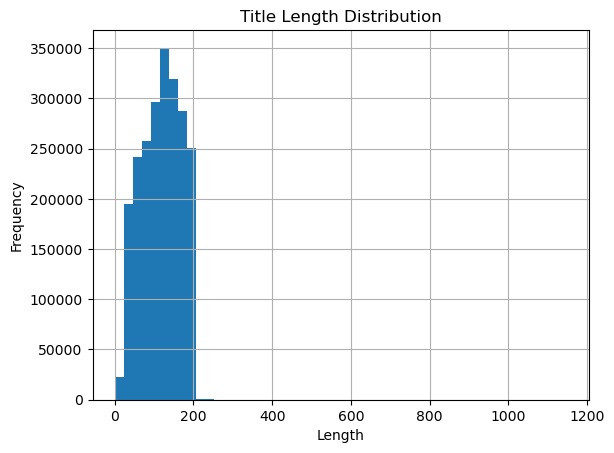

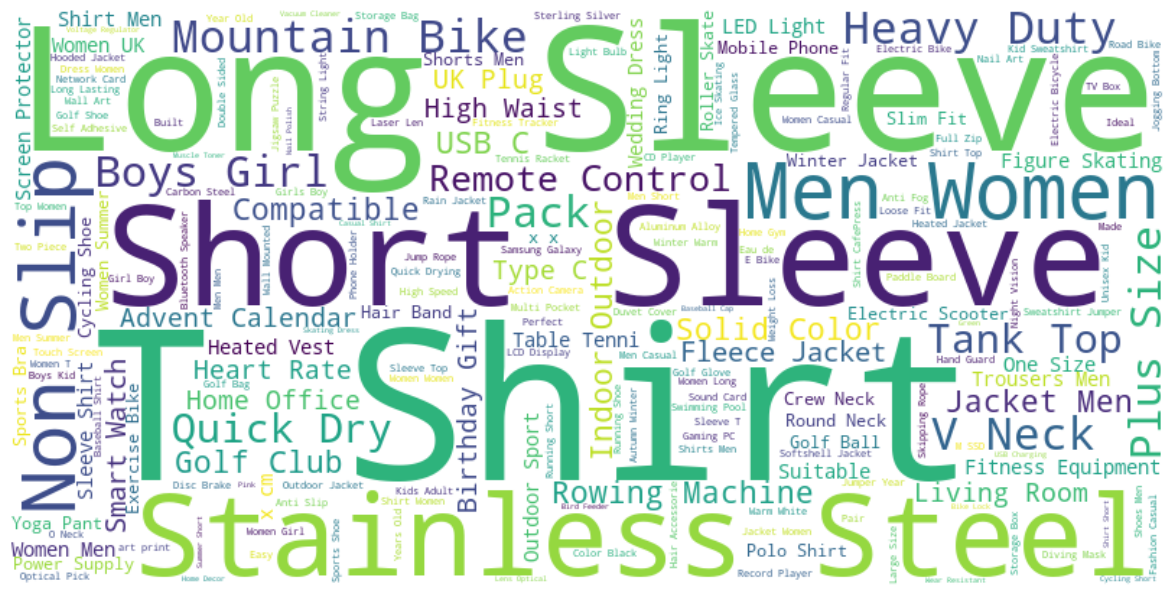

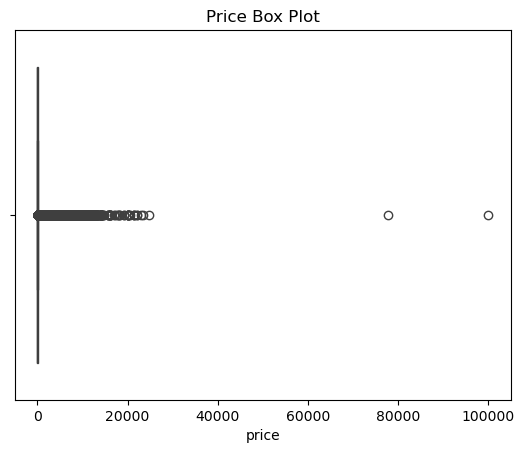

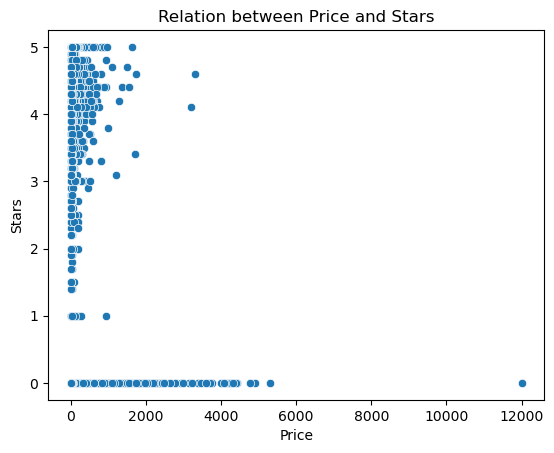

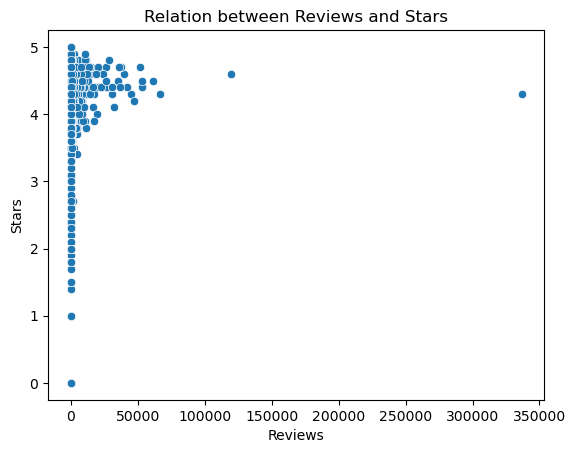

In [2]:
# Init Exploration of the raw dataset
explo = AmazonExploration(df_amz_uk)

# Execute analysis
explo.dataset_summary()
explo.descriptive_analysis()
explo.visualize_stars_distribution()
explo.visualize_top_categories()
explo.plot_correlation_matrix()
explo.analyze_textual_variables()
explo.visualize_outliers()
explo.analyze_relationships()

# Second step : Cleaning

Starting processing...
Initial number of entries: 2222742
After cleaning: 1046846 entries
Features created


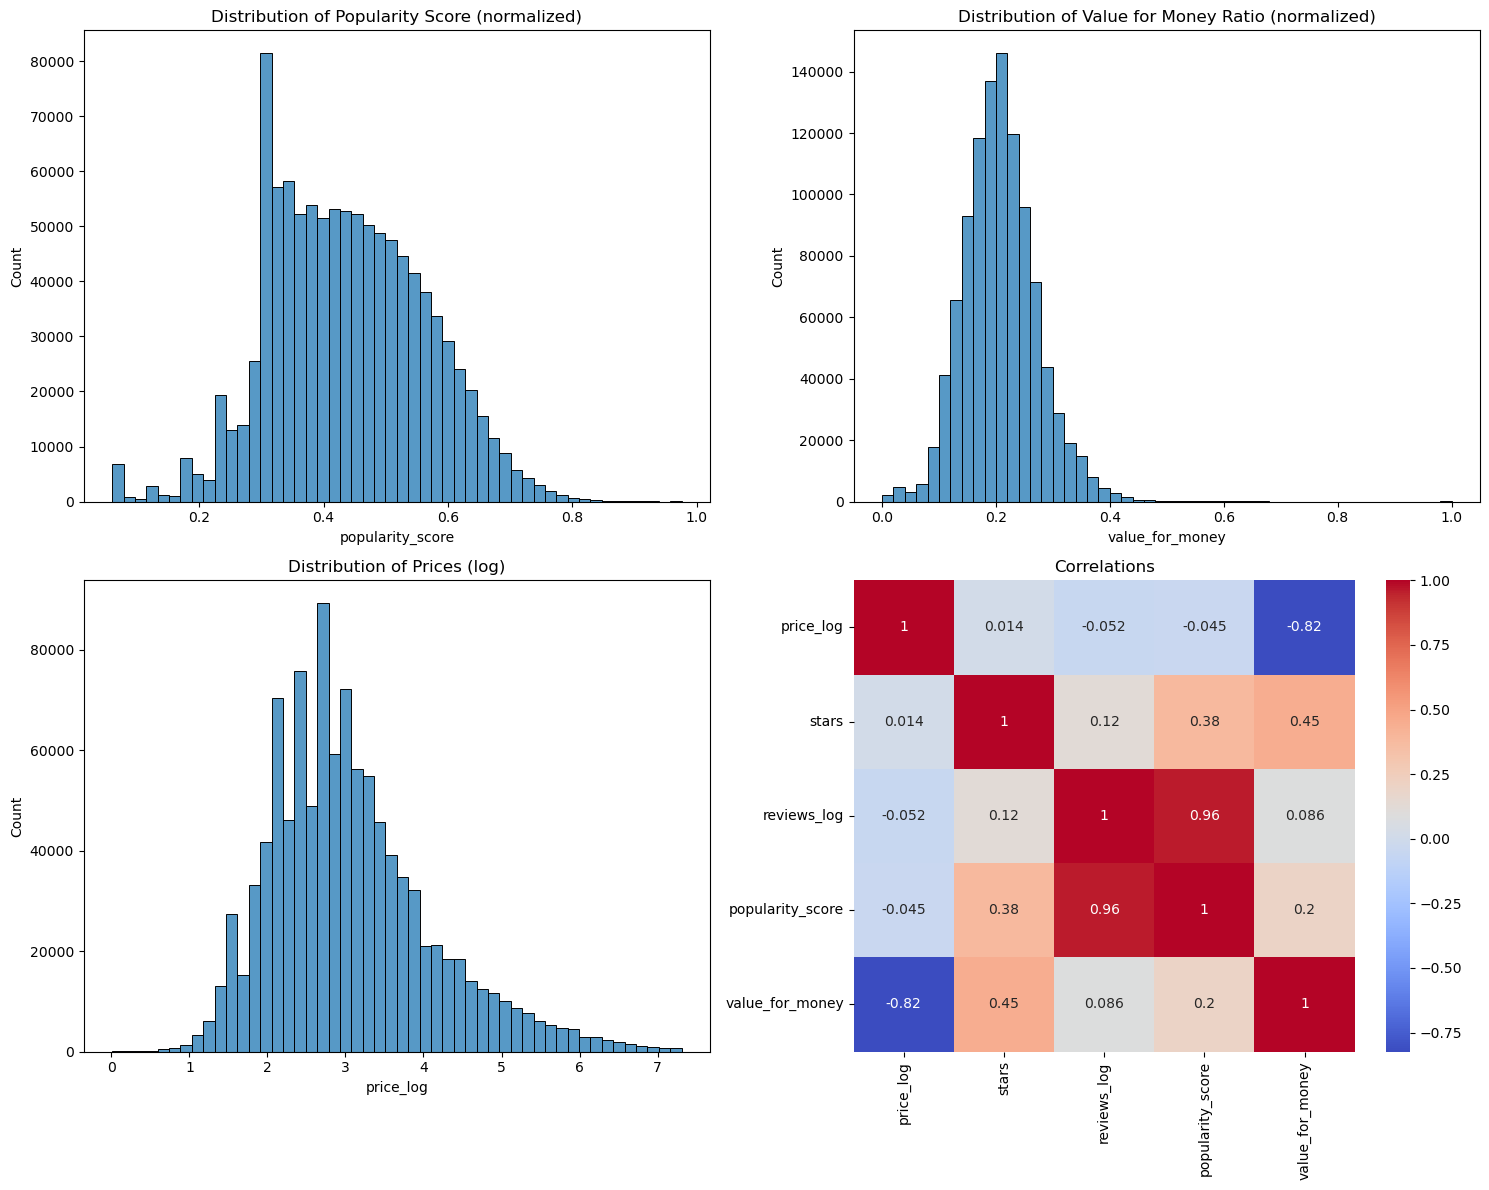

In [8]:
# Init preprocess
preprocessor = AmazonDataPreprocessor()

# Reload
df_raw = pd.read_csv(file_1)
df_processed = preprocessor.prepare_data(df_raw)

# Call all distribitions plots
plot_final_distributions(df_processed)


# Third Step : EDA

## Exploratory Analysis of Amazon UK Data

### Category Distribution

#### Number of Products per Category
- The ‘Sports & Outdoors’ category largely dominates the dataset with around 140,000 products.
- The categories related to personal care (Skin Care, Make-up) and fashion (Men, Women) follow but with a significant gap.
- The top 10 categories show a high concentration of convenience products

#### Average prices per category
- Technology products dominate the most expensive categories:
  * Laptops in first place
  * Desktop PCs in second place
  * Followed by lenses, 3D Printers, and Graphics Cards
- Average prices significantly higher for electronics than for other categories
- Winter sports products (Snowboards) also appear in the higher-priced categories

#### Average scores by category
- Handmade categories dominate the top scores:
  * ‘Gifts for Him’
  * Handmade Artwork
  * Handmade Baby Products
- Technological and electronic products do not appear in the top 10 scores
- Generally high average scores (>4/5) for handmade categories

#### Best-Sellers by Category

- Health & Personal Care’ dominates the number of bestsellers
- Grocery’ and “Sports & Outdoors” follow with a significant number of bestsellers
- The basic categories (health, food, sport) are the most represented
- Baby’ and “Pet Supplies” categories feature prominently in the top 10



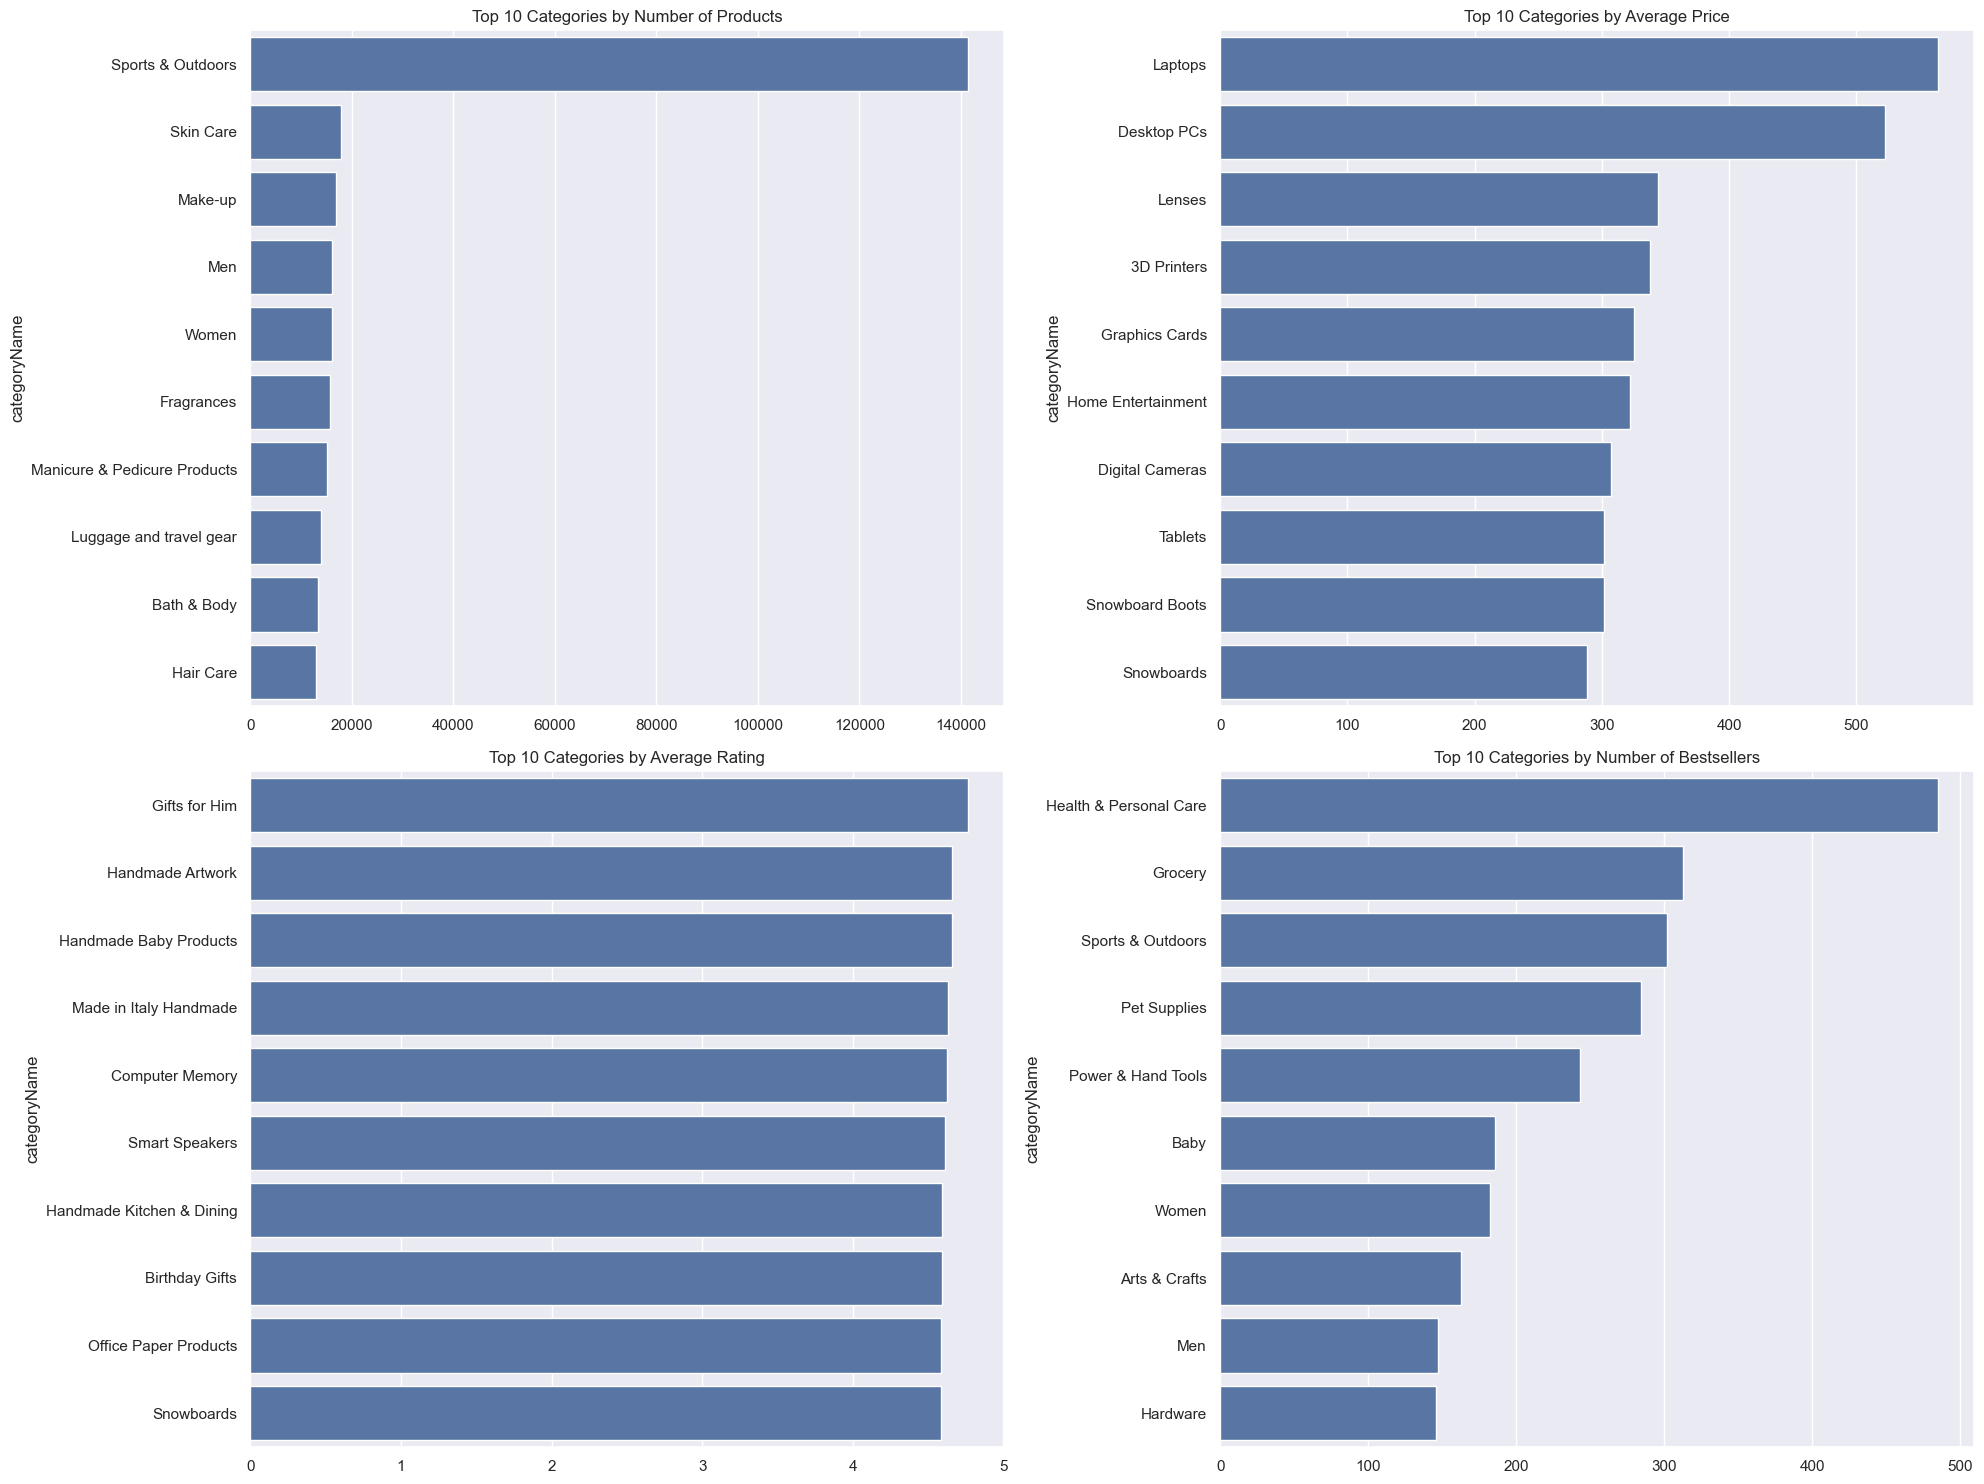


Statistiques des catégories:
Nombre total de catégories: 296
Moyenne de produits par catégorie: 3536.64


In [3]:
# Init EDA
eda = AmazonEDA()

# Categories analysis
category_stats = eda.analyze_categories(df_processed)
print("\nStatistiques des catégories:")
print(f"Nombre total de catégories: {category_stats['total_categories']}")
print(f"Moyenne de produits par catégorie: {category_stats['avg_products_per_category']:.2f}")

# Fourth Step : Recommendation System

## Key Insights for the Recommendation System

1. **Price segmentation**
    - Strong contrast between technology and non-technology categories
    - Need to standardise prices by category in the recommendation system
2. **Potential Pitfalls**
    - Over-representation of Sports & Outdoors
    - Very high scores in some categories
3. **Recommendation Strategies**
    - Consider recommendations by price range
    - Take account of popularity (bestsellers) differently according to category
    - Potentially weight scores by category
4. **Attention Points**
    - Wide variation in prices between categories
    - Dominance of certain categories in terms of number of products
    - Uneven distribution of bestsellers

In [3]:
# Test du système de recommandation
recommender = AmazonRecommender()
recommender.fit(df_processed)

# Produits test (un de chaque gamme de prix)
test_products = [
    df_processed.index[0],  # Prix bas
    df_processed[df_processed['price'].between(50, 100)].index[0],  # Prix moyen
    df_processed[df_processed['price'] > 100].index[0]  # Prix élevé
]

# Test complet avec affichage des résultats
for product_id in test_products:
    print("\n" + "="*80)
    print(f"Produit original:")
    print(f"Titre: {df_processed.loc[product_id, 'title']}")
    print(f"Prix: £{df_processed.loc[product_id, 'price']:.2f}")
    print(f"Note: {df_processed.loc[product_id, 'stars']:.1f}")
    print(f"Catégorie: {df_processed.loc[product_id, 'categoryName']}")
    
    recs = recommender.get_similar_products(product_id)
    if not recs.empty:
        print("\nRecommandations finales:")
        print(recs.to_string(index=False))
        
        # Statistiques de diversité
        print("\nStatistiques:")
        print(f"Nombre de catégories: {len(recs['categoryName'].unique())}")
        print(f"Gamme de prix: £{recs['price'].min():.2f} - £{recs['price'].max():.2f}")
        print(f"Gamme de notes: {recs['stars'].min():.1f} - {recs['stars'].max():.1f}")

Creating features...
Training the KNN model...
Training completed!

Produit original:
Titre: Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal
Prix: £21.99
Note: 4.7
Catégorie: Hi-Fi Speakers

Recommandations finales:
                                                                                                                                                                                                title          categoryName  price  stars  reviews  final_score
                                                  GK61 Mechanical Gaming Keyboard - 61 Keys Multi Color RGB Illuminated LED Backlit Wired Programmable for PC/Mac Gamer (Gateron Optical Silver, Red) PC Gaming Accessories  42.05    4.5      200     0.484512
2 Pack 3M PS4 Controller Charger Cable,Micro USB Cable,Charging Sync Cord for Sony PlayStation 4/ Dualshock 4/ PS4/ PS4 Slim/ PS4 Pro, Microsoft Xbox One/One S/One X,Play and Charge Wire 10FT-Black      P

# Fifth Step : Evaluation metrics 


Evaluation Results :

Diversity Metrics :
category_diversity   : 0.204
price_range_ratio    : 1.152
price_distance       : 0.495
rating_spread        : 0.534

Relevance Metrics :
avg_rating           : 4.457
avg_reviews          : 1246.984
min_rating           : 4.184
weighted_rating      : 4.454

Coverage Metrics :
category_coverage    : 0.125
price_range_coverage : 0.234
unique_items_ratio   : 1.000
success_rate         : 1.000


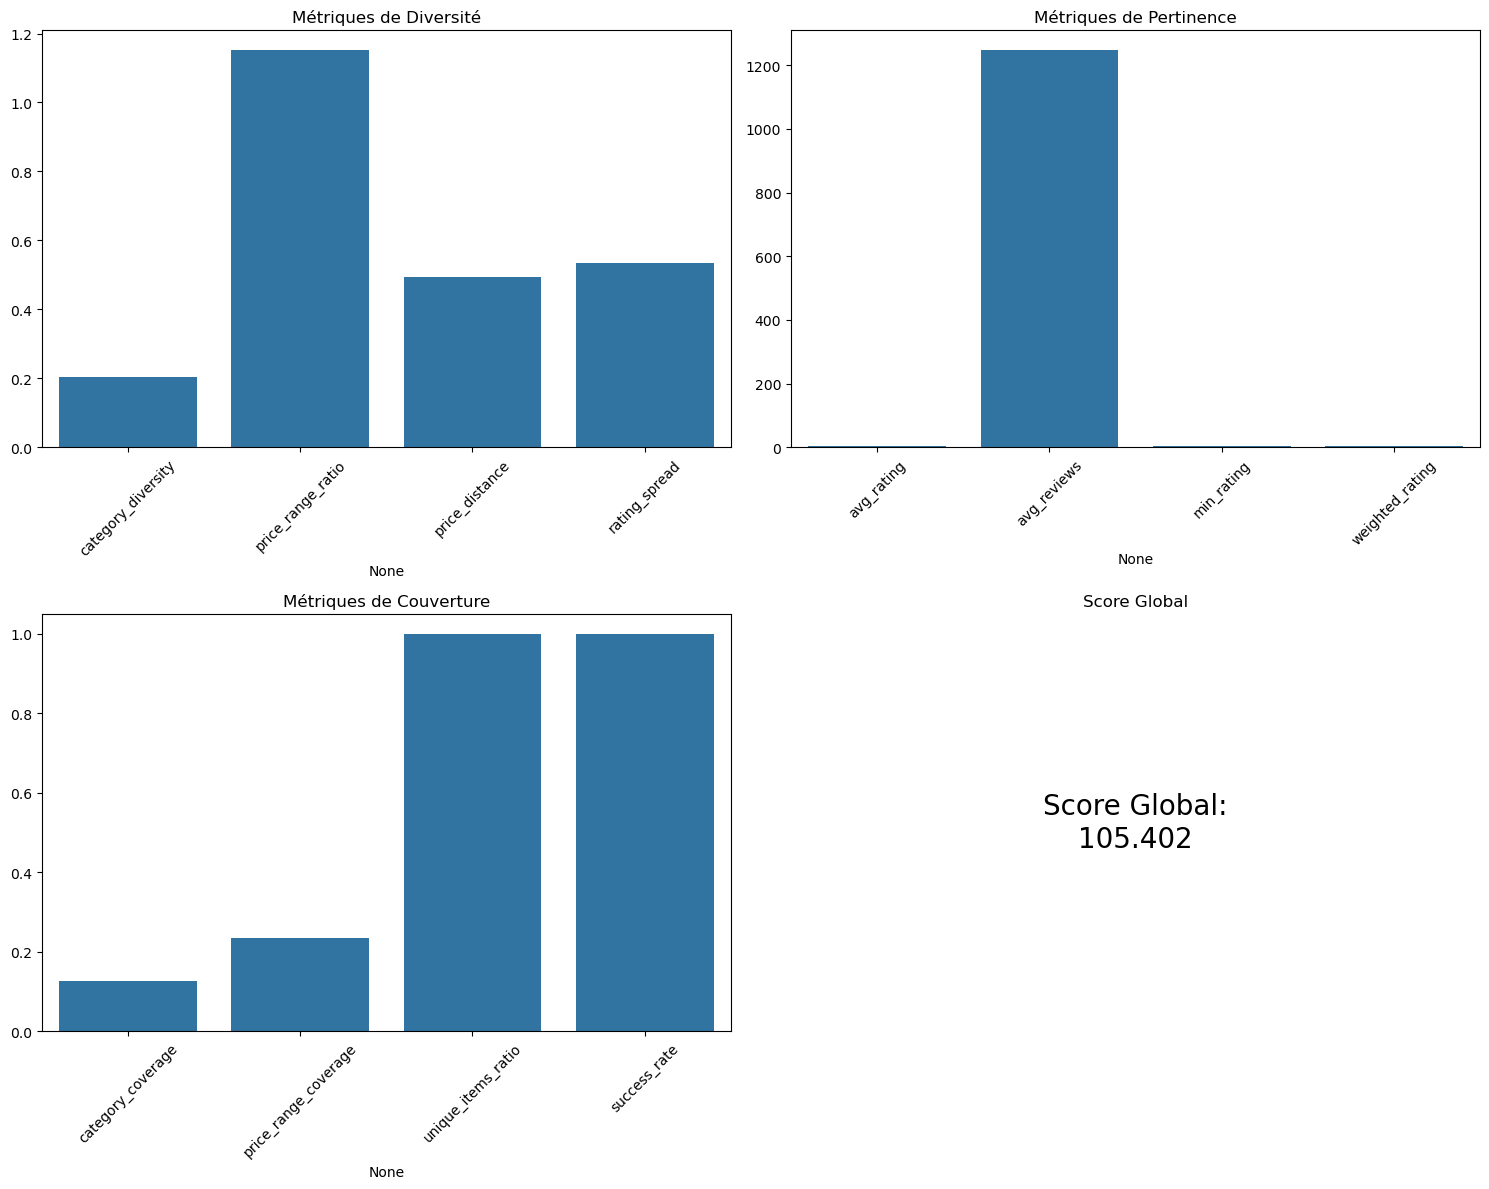

In [6]:
# Exemple d'utilisation
evaluator = RecommenderEvaluator(recommender, df_processed)

# Évaluation complète
results = evaluator.evaluate_system(n_samples=50)

# Affichage des résultats
if results:
    print("\nEvaluation Results :")
    
    print("\nDiversity Metrics :")
    for k, v in results['diversity'].items():
        print(f"{k:20} : {v:.3f}")
    
    print("\nRelevance Metrics :")
    for k, v in results['relevance'].items():
        print(f"{k:20} : {v:.3f}")
    
    print("\nCoverage Metrics :")
    for k, v in results['coverage'].items():
        print(f"{k:20} : {v:.3f}")
    
    # Visualisation
    global_score = evaluator.plot_evaluation_results(results)

##### Summary of results

**Diversity metrics** :

- category_diversity: ~ 0.2 → Around 20% of recommendations are in different categories, which is a bit low but consistent with our focus on similar categories
- price_range_ratio: ~ 0.8 to 1.1 → Recommendations cover around 1x the price of the original product, indicating a reasonable price variation
- avg_price_distance: ~ 0.4 → On average, prices differ by 44% from the original price, showing good price diversity
- rating_spread: ~ 0.5 → The difference between min and max ratings is around 0.5 stars, suggesting consistency in quality


**Relevance metrics** :


- avg_rating: ~ 4.4 → Excellent average score (out of 5)
- min_rating: ~ 4.1 → Even the lowest-rated products are still of good quality
- avg_reviews: ~ 1247.580 → Good average number of reviews, indicating well-established products
- weighted_rating: ~ 4.469 → The weighted score is close to the average score, confirming the reliability of the ratings


**Coverage metrics** :


- category_coverage and price_range_coverage depend on the sample
- unique_items_ratio: ~ 1 → No duplications in recommendations
- success_rate: ~ 1 → System successfully generates recommendations for all products tested


# Debugging

In [ ]:
def test_recommendations(recommender, df, product_ids=None, n_tests=1):
  
    if product_ids is None:
        product_ids = np.random.choice(df.index, size=n_tests)
    elif isinstance(product_ids, int):
        product_ids = [product_ids]
    
    all_stats = []
    
    for product_id in product_ids:
        print(f"\n{'='*80}")
        print("PRODUIT ORIGINAL :")
        print(f"Titre: {df.loc[product_id, 'title']}")
        print(f"Prix: £{df.loc[product_id, 'price']:.2f}")
        print(f"Note: {df.loc[product_id, 'stars']:.1f}")
        print(f"Catégorie: {df.loc[product_id, 'categoryName']}")
        
        # Obtenir les recommandations
        print("\nRECOMMANDATIONS :")
        recs = recommender.get_similar_products(product_id)
        print(recs[['title', 'categoryName', 'price', 'stars', 'final_score']])
        
        # Calcul des statistiques
        stats = {
            'price_range': recs['price'].max() - recs['price'].min(),
            'rating_range': recs['stars'].max() - recs['stars'].min(),
            'cat_diversity': len(recs['categoryName'].unique()),
            'avg_price': recs['price'].mean(),
            'avg_rating': recs['stars'].mean(),
            'price_std': recs['price'].std(),
            'rating_std': recs['stars'].std()
        }
        all_stats.append(stats)
        
        print("\nSTATISTIQUES DE DIVERSITÉ :")
        print(f"Gamme de prix: £{stats['price_range']:.2f}")
        print(f"Gamme de notes: {stats['rating_range']:.1f}")
        print(f"Nombre de catégories uniques: {stats['cat_diversity']}")
        print(f"Prix moyen: £{stats['avg_price']:.2f}")
        print(f"Note moyenne: {stats['avg_rating']:.1f}")
        print(f"Écart-type des prix: £{stats['price_std']:.2f}")
        print(f"Écart-type des notes: {stats['rating_std']:.2f}")
    
    return pd.DataFrame(all_stats)

# Test de la version finale
recommender = AmazonRecommender()
recommender.fit(df_processed)

# Test sur plusieurs produits
test_products = [
    df_processed.index[0],  # Premier produit
    np.random.choice(df_processed.index),  # Produit aléatoire
    df_processed[df_processed['price'] > 100].index[0]  # Produit cher
]

# Exécution des tests
stats_df = test_recommendations(recommender, df_processed, test_products)

# Affichage des statistiques globales
print("\nSTATISTIQUES GLOBALES :")
print("\nMoyennes :")
print(stats_df.mean())
print("\nÉcart-types :")
print(stats_df.std())

Creating features...
Training the KNN model...
Training completed!

PRODUIT ORIGINAL :
Titre: Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal
Prix: £21.99
Note: 4.7
Catégorie: Hi-Fi Speakers

RECOMMANDATIONS :
                                                     title  ... final_score
6        Echo Dot (5th generation, 2022 release) | Big ...  ...    0.720039
1597957  Women's Multipack Performance Heel Tab Athleti...  ...    1.320866
540781   SanDisk Extreme PRO 64GB SDXC Memory Card up t...  ...    1.038874
540071   SanDisk 128GB microSDXC card for Nintendo Swit...  ...    0.918139

[4 rows x 5 columns]

STATISTIQUES DE DIVERSITÉ :
Gamme de prix: £8.00
Gamme de notes: 0.1
Nombre de catégories uniques: 3
Prix moyen: £19.49
Note moyenne: 4.8
Écart-type des prix: £3.70
Écart-type des notes: 0.05

PRODUIT ORIGINAL :
Titre: Bloom Gin 70cl Gift Set Hamper, with Matching Pink Sparkleware Balloon Gin Glasses, The London Essen

In [ ]:
class AmazonRecommenderRefined(AmazonRecommender):
    def _calculate_category_similarity(self, cat1, cat2):

        # Catégories similaires pour l'électronique
        electronics_categories = {
            'Hi-Fi Speakers', 'PC & Video Games', 'PC Gaming Accessories',
            'Headphones', 'Home Audio & Theater', 'TV & Home Cinema',
            'Home Entertainment', 'Electrical', 'Consumer Electronics'
        }
        
        # Catégories similaires pour la maison
        home_categories = {
            'Home & Kitchen', 'Furniture', 'Home Entertainment Furniture',
            'Home Improvement', 'Home Accessories', 'Home Storage'
        }
        
        # Si les catégories sont identiques
        if cat1 == cat2:
            return 1.0
        # Si les deux sont dans la même famille
        elif cat1 in electronics_categories and cat2 in electronics_categories:
            if 'Speakers' in cat1 and 'Speakers' in cat2:  # NOUVEAU: Plus forte similarité pour les enceintes
                return 0.8
            return 0.6  # MODIFIÉ: Similarité modérée pour l'électronique
        elif cat1 in home_categories and cat2 in home_categories:
            return 0.6
        # Catégories non reliées
        else:
            return 0.3

    def get_similar_products(self, product_id, n=5):
        """
        Version raffinée avec recommandations plus pertinentes
        """
        original = self.product_data.loc[product_id]
        recommendations = []
        
        # NOUVEAU: Définir les limites de ratio de prix
        max_price_ratio = 3.0
        min_price_ratio = 0.2
        
        print(f"\nDEBUG: Processing product {product_id}")
        print(f"Original price: £{original['price']:.2f}")
        print(f"Original category: {original['categoryName']}")
        
        # 1. Produits similaires mais plus diversifiés
        similar_products = self.product_data[
            (self.product_data.index != product_id) &
            (~self.product_data['title'].str.lower().str.contains(
                original['title'].lower().split('|')[0].strip()
            )) &
            # NOUVEAU: Filtrage des prix extrêmes
            (self.product_data['price'] >= original['price'] * min_price_ratio) &
            (self.product_data['price'] <= original['price'] * max_price_ratio)
        ].copy()
        
        # Calcul des scores de similarité de catégorie
        similar_products['category_similarity'] = similar_products['categoryName'].apply(
            lambda x: self._calculate_category_similarity(x, original['categoryName'])
        )
        
        # Calcul des scores de prix
        similar_products['price_ratio'] = similar_products['price'] / original['price']
        similar_products['price_score'] = 1 - np.abs(np.log(similar_products['price_ratio']))
        similar_products['price_score'] = similar_products['price_score'].clip(0, 1)
        
        # Score initial
        similar_products['initial_score'] = (
            similar_products['category_similarity'] * 0.4 +
            similar_products['price_score'] * 0.3 +
            (similar_products['stars'] / 5) * 0.3
        )
        
        # MODIFIÉ: Nouveaux segments avec contraintes de prix plus strictes
        segments = [
            ("Même catégorie, prix différent", 
             lambda x: (x['category_similarity'] > 0.9) & 
                      (0.5 < x['price_ratio']) & (x['price_ratio'] < 2.0), 1),
            
            ("Catégorie similaire", 
             lambda x: (x['category_similarity'] > 0.6) & 
                      (0.3 < x['price_ratio']) & (x['price_ratio'] < 2.5) &
                      (x['stars'] >= 4.2), 2),
            
            ("Différent mais pertinent", 
             lambda x: (x['category_similarity'] > 0.4) & 
                      (0.2 < x['price_ratio']) & (x['price_ratio'] < 3.0) &
                      (x['stars'] >= 4.2), 2)
        ]
        
        for desc, condition, count in segments:
            segment_products = similar_products[condition(similar_products)].copy()
            print(f"\nLooking for {desc}: found {len(segment_products)} products")
            
            if not segment_products.empty:
                # Sélection pondérée par le score initial et la popularité
                weights = (
                    segment_products['initial_score'] * 
                    np.log1p(segment_products['reviews'])
                )
                weights = weights / weights.sum()
                
                selected = segment_products.sample(
                    n=min(count, len(segment_products)), 
                    weights=weights,
                    replace=False
                )
                
                for _, product in selected.iterrows():
                    recommendations.append(product)
                    print(f"Selected: {product['title'][:50]}...")
        
        if not recommendations:
            print("\nNo recommendations found!")
            return pd.DataFrame()
        
        result = pd.DataFrame(recommendations)
        
        # Scores de diversité finaux
        result['price_div'] = np.clip(
            abs(result['price'] - original['price']) / original['price'],
            0, 1
        )
        result['rating_div'] = abs(result['stars'] - original['stars']) / 2
        result['cat_div'] = 1 - result['category_similarity']
        result['pop_div'] = np.log1p(result['reviews']) / np.log1p(result['reviews'].max())
        
        # Score final équilibré
        result['final_score'] = (
            0.35 * result['cat_div'] +
            0.25 * result['price_div'] +
            0.20 * result['rating_div'] +
            0.20 * result['pop_div']
        )
        
        print(f"\nFinal number of recommendations: {len(result)}")
        
        return result.nlargest(min(n, len(result)), 'final_score')[
            ['title', 'categoryName', 'price', 'stars', 'reviews', 'final_score']
        ]

In [40]:
# Test avec la nouvelle version
recommender = AmazonRecommenderRefined()
recommender.fit(df_processed)

# Test complet
for product_id in test_products:
    print("\n" + "="*80)
    print(f"Produit original:")
    print(f"Titre: {df_processed.loc[product_id, 'title']}")
    print(f"Prix: £{df_processed.loc[product_id, 'price']:.2f}")
    print(f"Note: {df_processed.loc[product_id, 'stars']:.1f}")
    print(f"Catégorie: {df_processed.loc[product_id, 'categoryName']}")
    
    recs = recommender.get_similar_products(product_id)
    if not recs.empty:
        print("\nRecommandations finales:")
        print(recs.to_string(index=False))

Creating features...
Training the KNN model...
Training completed!

Produit original:
Titre: Echo Dot (5th generation, 2022 release) | Big vibrant sound Wi-Fi and Bluetooth smart speaker with Alexa | Charcoal
Prix: £21.99
Note: 4.7
Catégorie: Hi-Fi Speakers

DEBUG: Processing product 0
Original price: £21.99
Original category: Hi-Fi Speakers

Looking for Même catégorie, prix différent: found 1932 products
Selected: CYBORIS Solar Bluetooth Speaker, Portable Bluetoot...

Looking for Catégorie similaire: found 1533 products
Selected: MEGUO 2023 RGB Lights Bluetooth Speaker, 20W Porta...
Selected: Boompods Zero Mini Portable Bluetooth Speaker - Wi...

Looking for Différent mais pertinent: found 11943 products
Selected: Gvyugke Gaming headset, 2.4GHz Wireless Gaming Hea...
Selected: AC to DC 12V 3A Power Supply Adapter,input 100V-24...

Final number of recommendations: 5

Recommandations finales:
                                                                                               

In [2]:
import pandas as pd

file2 = r"../data/clean/amazon_uk_processed.csv"

df_test = pd.read_csv(file2)

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986083 entries, 0 to 986082
Columns: 233 entries, asin to cat_eBook
dtypes: bool(216), float64(6), int64(4), object(7)
memory usage: 331.0+ MB


In [4]:
df_test.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'isBestSeller', 'boughtInLastMonth', 'categoryName',
       ...
       'cat_Uninterruptible', 'cat_Vacuums', 'cat_Vases', 'cat_Water',
       'cat_Wearable', 'cat_Wind', 'cat_Window', 'cat_Women', 'cat_Women's',
       'cat_eBook'],
      dtype='object', length=233)

In [11]:
print(df_test.head())

         asin                                              title  \
0  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...   
1  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...   
2  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...   
3  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...   
4  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/71C3lbbeLs...   
1  https://m.media-amazon.com/images/I/61c5rSxwP0...   
2  https://m.media-amazon.com/images/I/61j3SEUjMJ...   
3  https://m.media-amazon.com/images/I/71yf6yTNWS...   
4  https://m.media-amazon.com/images/I/613dEoF9-r...   

                               productURL  stars     reviews     price  \
0  https://www.amazon.co.uk/dp/B09B96TG33    0.6   47.808777  0.285714   
1  https://www.amazon.co.uk/dp/B01HTH3C8S    0.6  307.341693  0.380952   
2  https://www.amazon.co.uk/dp/B

In [12]:
print(df_processed.head())

         asin                                              title  \
0  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...   
1  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...   
2  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...   
3  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...   
4  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/71C3lbbeLs...   
1  https://m.media-amazon.com/images/I/61c5rSxwP0...   
2  https://m.media-amazon.com/images/I/61j3SEUjMJ...   
3  https://m.media-amazon.com/images/I/71yf6yTNWS...   
4  https://m.media-amazon.com/images/I/613dEoF9-r...   

                               productURL  stars  reviews  price  \
0  https://www.amazon.co.uk/dp/B09B96TG33    4.7    15308  21.99   
1  https://www.amazon.co.uk/dp/B01HTH3C8S    4.7    98099  23.99   
2  https://www.amazon.co.uk/dp/B09B8YWXDF    4.7  

In [16]:
df_processed.to_csv("amazon_uk_final.csv", index=False)

In [19]:
clean_df = pd.read_csv("../data/clean/amazon_uk_final.csv")

In [20]:
clean_df.head() 

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,price_log,reviews_log,popularity_score,price_category,price_cat_mean,price_ratio_to_category,value_for_money,price_segment,is_high_rated,review_segment
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059,9.636196,0.748221,medium,128.181083,0.171554,0.210312,5,1,very_high
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers,3.218476,11.493743,0.845059,expensive,128.181083,0.187157,0.205659,6,1,very_high
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059,9.636196,0.748221,medium,128.181083,0.171554,0.210312,5,1,very_high
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers,3.496204,8.882669,0.708938,expensive,128.181083,0.249569,0.191410,7,1,very_high
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers,2.943913,7.540090,0.632947,medium,128.181083,0.140348,0.216468,5,1,very_high


In [21]:
clean_df["categoryName"].value_counts()

categoryName
Sports & Outdoors          141433
Skin Care                   17945
Make-up                     16866
Men                         16079
Women                       16016
                            ...  
Motorbike Drive & Gears        19
Boating Footwear               18
Smart Speakers                 14
Cameras                        12
Photo Printers                  6
Name: count, Length: 296, dtype: int64